In [59]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [60]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [61]:
df=tf.keras.preprocessing.image_dataset_from_directory(
    directory='PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [62]:
class_names = df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [63]:
# 32 batches and length of each batch is 68
# 68*32=2176
len(df)

68

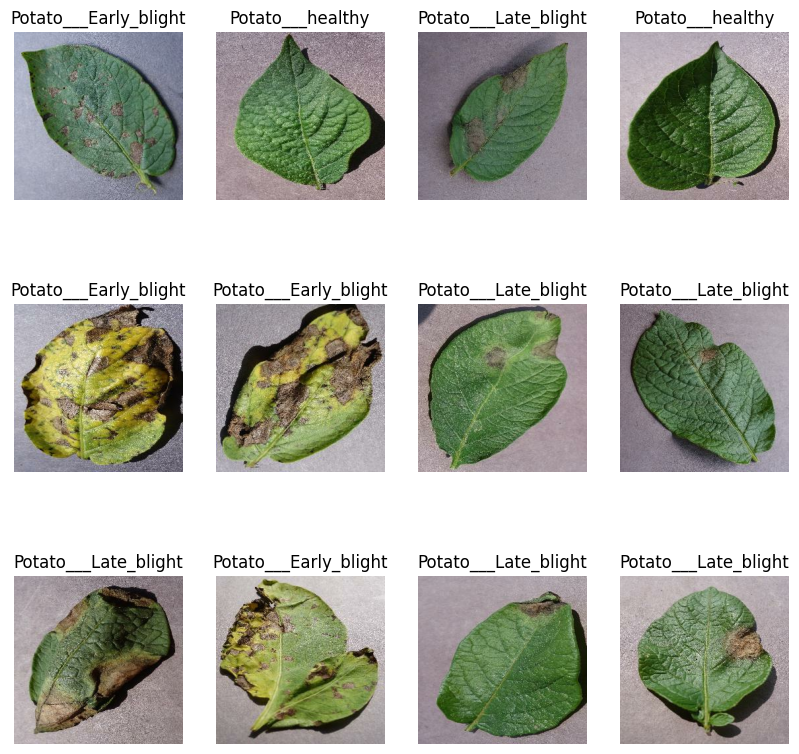

In [64]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #each image is a tensor so we convert it to array using numpy
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [65]:
#splitting data
#train = 80%, test = 10%, validation = 10%
#len of df=68
#80% of 68 = 54, 54 batches in train



In [66]:
#training set
train_ds=df.take(54) #80% of orginal dataset

#test and valid 
test_ds=df.skip(54) #20% of original dataset

valid_ds=test_ds.take(6) #10% of the original dataset

test_ds=test_ds.skip(6) #10% of the test dataset

In [67]:
resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [68]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [69]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model=models.Sequential([
    resize,
    data_augmentation,
    #convolution and pooling
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape), #convolution layer
    layers.MaxPooling2D((2,2), strides=2), #pooling layer
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2), strides=2),
    
    #flatten
    layers.Flatten(),

    #fully connected 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])

In [70]:
model.build(input_shape=input_shape)

In [71]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [72]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [74]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/50

54/54 [==============================] - 138s 2s/step - loss: 0.7883 - accuracy: 0.6372 - val_loss: 0.4592 - val_accuracy: 0.8385
Epoch 2/50
54/54 [==============================] - 84s 2s/step - loss: 0.4455 - accuracy: 0.8513 - val_loss: 0.5247 - val_accuracy: 0.8281
Epoch 3/50
54/54 [==============================] - 77s 1s/step - loss: 0.3960 - accuracy: 0.8565 - val_loss: 0.4848 - val_accuracy: 0.8125
Epoch 4/50
54/54 [==============================] - 77s 1s/step - loss: 0.3820 - accuracy: 0.8513 - val_loss: 0.3605 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 78s 1s/step - loss: 0.3072 - accuracy: 0.8681 - val_loss: 0.4305 - val_accuracy: 0.8073
Epoch 6/50
54/54 [==============================] - 76s 1s/step - loss: 0.2459 - accuracy: 0.9062 - val_loss: 0.1853 - val_accuracy: 0.9531
Epoch 7/50
54/54 [==============================] - 69s 1s/step - loss: 0.2325 - accuracy: 0.9132 - val_loss: 0.1194 - val_accuracy: 0.9531
Epoch 8/50
54/54 [

In [75]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 191ms/step - loss: 0.4879 - accuracy: 0.8621


In [76]:
scores

[0.487899512052536, 0.8620689511299133]

In [77]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [78]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [79]:
history.history['accuracy']

[0.6371527910232544,
 0.8512731194496155,
 0.8564814925193787,
 0.8512731194496155,
 0.8680555820465088,
 0.90625,
 0.9131944179534912,
 0.9137731194496155,
 0.9346064925193787,
 0.9351851940155029,
 0.9363425970077515,
 0.9421296119689941,
 0.9444444179534912,
 0.9398148059844971,
 0.9490740895271301,
 0.9513888955116272,
 0.9236111044883728,
 0.9212962985038757,
 0.9571759104728699,
 0.9583333134651184,
 0.9456018805503845,
 0.9612268805503845,
 0.9751157164573669,
 0.9652777910232544,
 0.9716435074806213,
 0.9728009104728699,
 0.96875,
 0.9629629850387573,
 0.9641203880310059,
 0.9444444179534912,
 0.9675925970077515,
 0.9577546119689941,
 0.9600694179534912,
 0.9728009104728699,
 0.9803240895271301,
 0.9774305820465088,
 0.9780092835426331,
 0.9791666865348816,
 0.9855324029922485,
 0.9774305820465088,
 0.9785879850387573,
 0.9791666865348816,
 0.9739583134651184,
 0.9803240895271301,
 0.9704861044883728,
 0.9728009104728699,
 0.9791666865348816,
 0.9733796119689941,
 0.97337961196

In [80]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

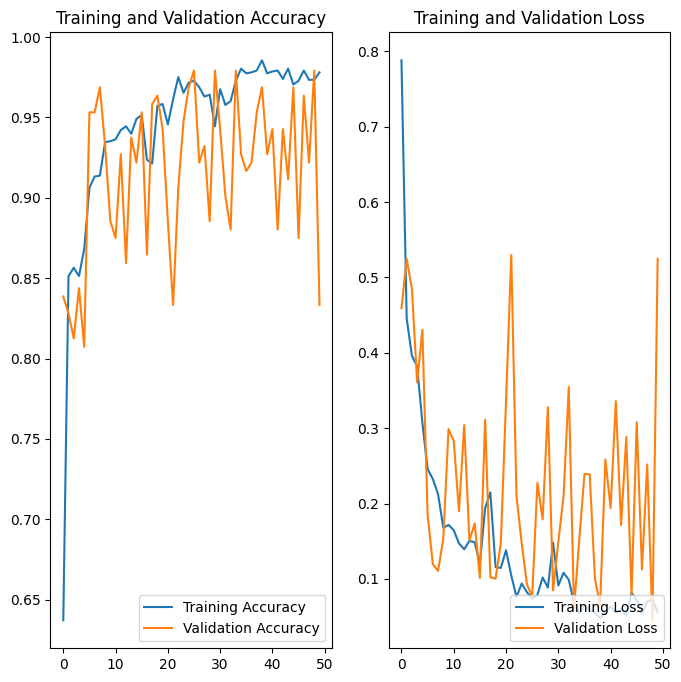

In [82]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training and Validation Loss")

First image to predict.
Actual label:  Potato___Early_blight
1/1 [==============================] - 0s 222ms/step
Predicted label:  Potato___Early_blight


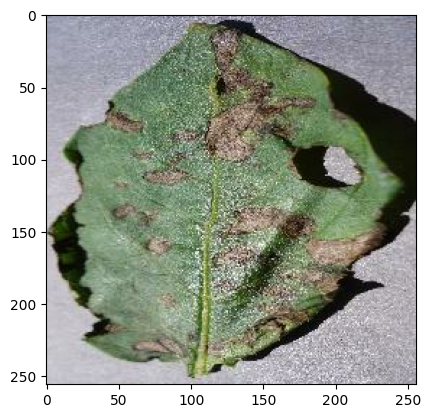

In [87]:
#prediction
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("First image to predict.")
    plt.imshow(first_image)
    print("Actual label: ", class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print('Predicted label: ', class_names[np.argmax(batch_prediction[0])])
    

In [88]:
def predict(mode, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


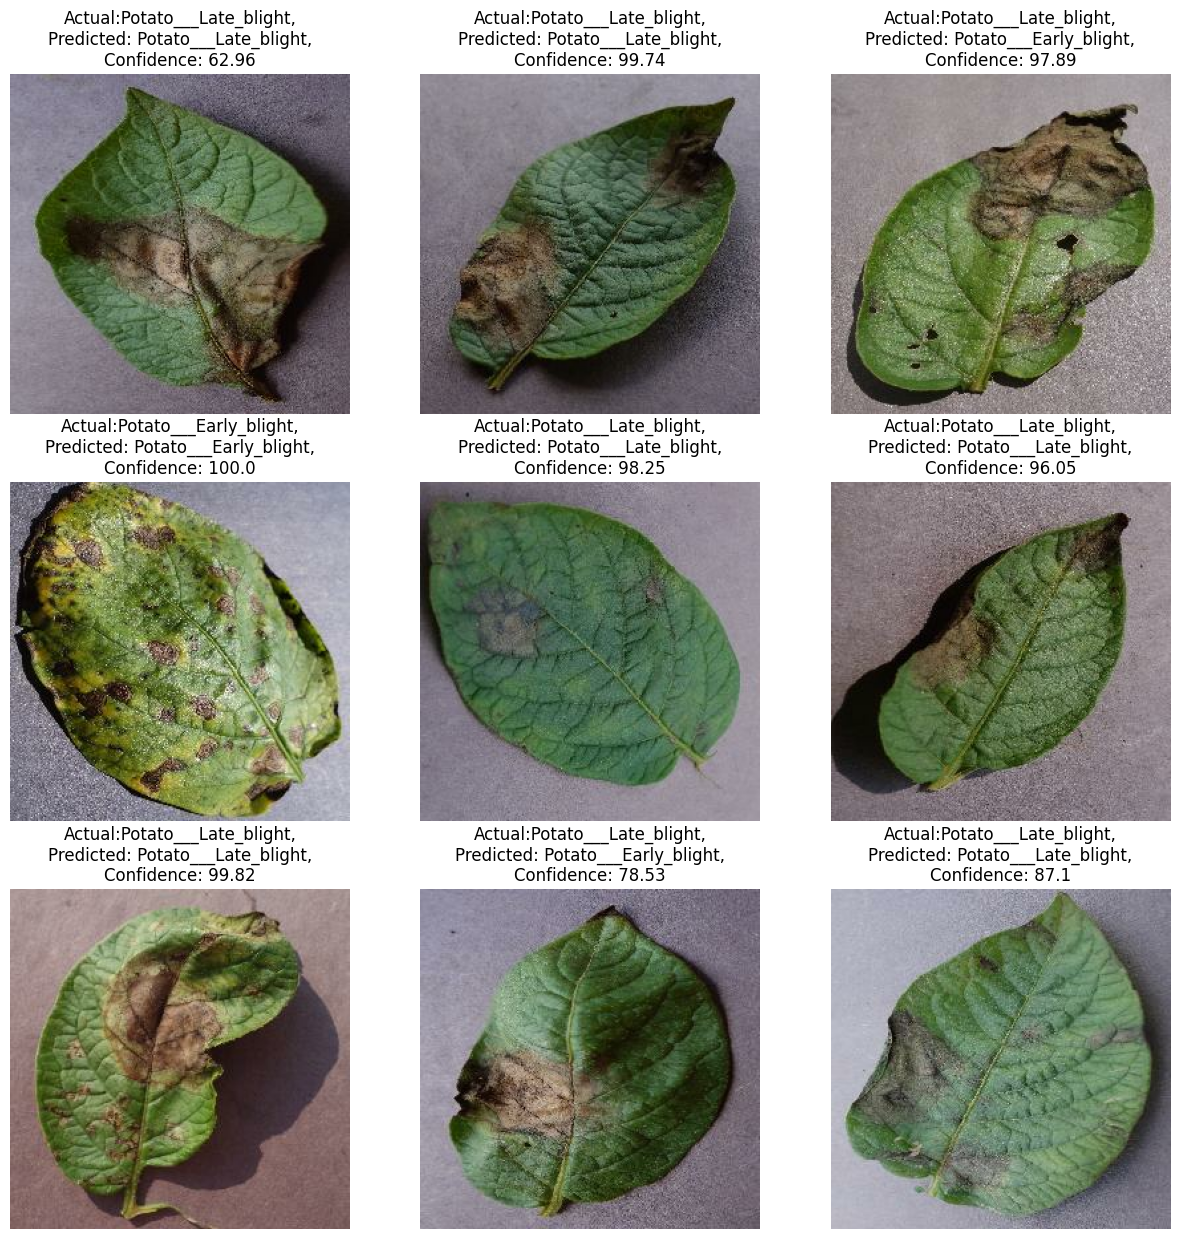

In [91]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}")
        
        plt.axis('off')

In [97]:
import os
import tensorflow as tf  # Assuming you are using TensorFlow

# Your model definition and training code here

# Create the 'models' directory if it doesn't exist
models_directory = "../models"
os.makedirs(models_directory, exist_ok=True)

# Calculate the next model version
model_versions = [int(i) for i in os.listdir(models_directory) + [0]]
model_version = max(model_versions) + 1

# Save the model
model.save(f"{models_directory}/{model_version}")


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'